<a href="https://colab.research.google.com/github/alvaradovallejo-juan/FashionMNIST/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fashion MNIST Dataset

##Importing libraries

In [30]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##Fashion MNIST Dataset

In [31]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [32]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##Exploring data

In [33]:
train_images.shape

(60000, 28, 28)

In [34]:
test_images.shape

(10000, 28, 28)

##Preparing data

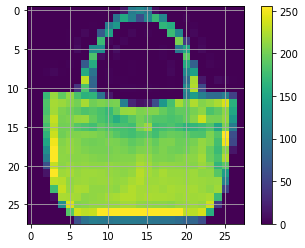

In [35]:
plt.figure()
plt.imshow(train_images[100])
plt.grid(True)
plt.colorbar()

In [36]:
train_images = train_images / 255.0
test_images = test_images / 255.0

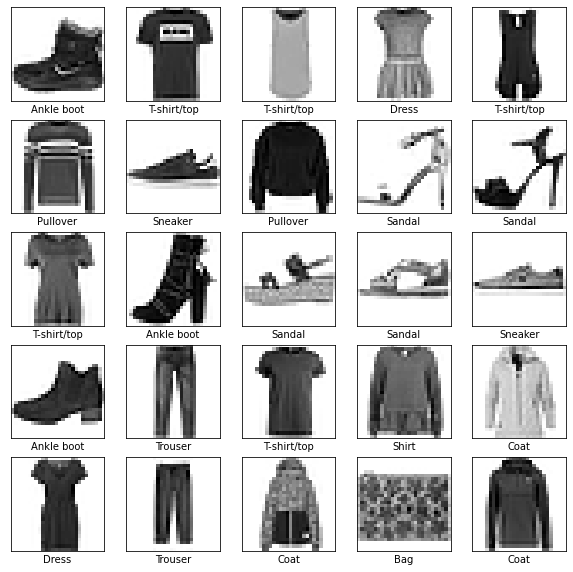

In [37]:
plt.figure(figsize = (10,10))

for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

##The model

In [38]:
model = keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)), 
                          tf.keras.layers.Dense(128, activation = 'relu'), 
                          tf.keras.layers.Dense(10)
                          ])

In [39]:
model.compile(optimizer = 'adam',
              loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
              )

In [40]:
model.fit(train_images, train_labels, epochs = 8)

Epoch 1/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4981 - accuracy: 0.8256
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3766 - accuracy: 0.8642
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3369 - accuracy: 0.8775
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3118 - accuracy: 0.8858
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2946 - accuracy: 0.8914
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2809 - accuracy: 0.8961
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2687 - accuracy: 0.9000
Epoch 8/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2593 - accuracy: 0.9029


##Evaluating accuracy

In [41]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3601 - accuracy: 0.8663
Accuracy:  0.8662999868392944


##Predictions

In [42]:
model_probability = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()
                                        ])
predictions = model_probability.predict(test_images)

In [44]:
predictions[100]

array([1.4853891e-03, 3.2303527e-05, 7.0095288e-05, 9.9812847e-01,
       4.5649103e-06, 2.2765539e-06, 2.7453862e-04, 4.6419618e-11,
       1.9122540e-06, 4.4940754e-07], dtype=float32)

In [47]:
# The model works!!
test_labels[100] == np.argmax(predictions[100])

True

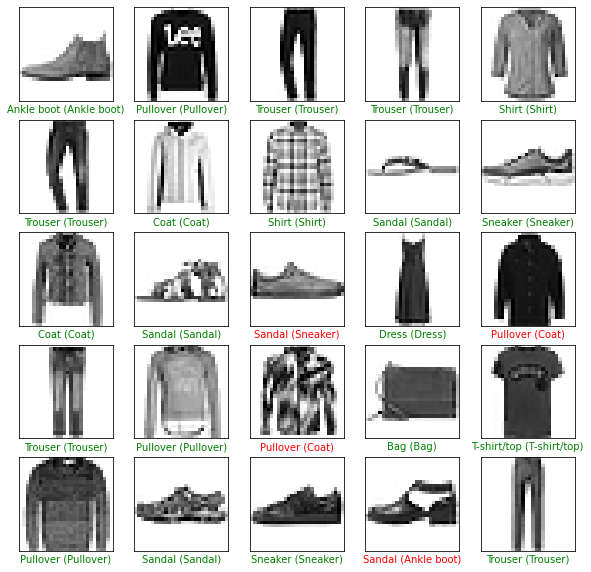

In [48]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color = color)

In [54]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

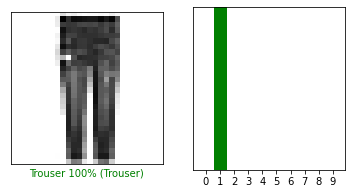

In [55]:
i = 200
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

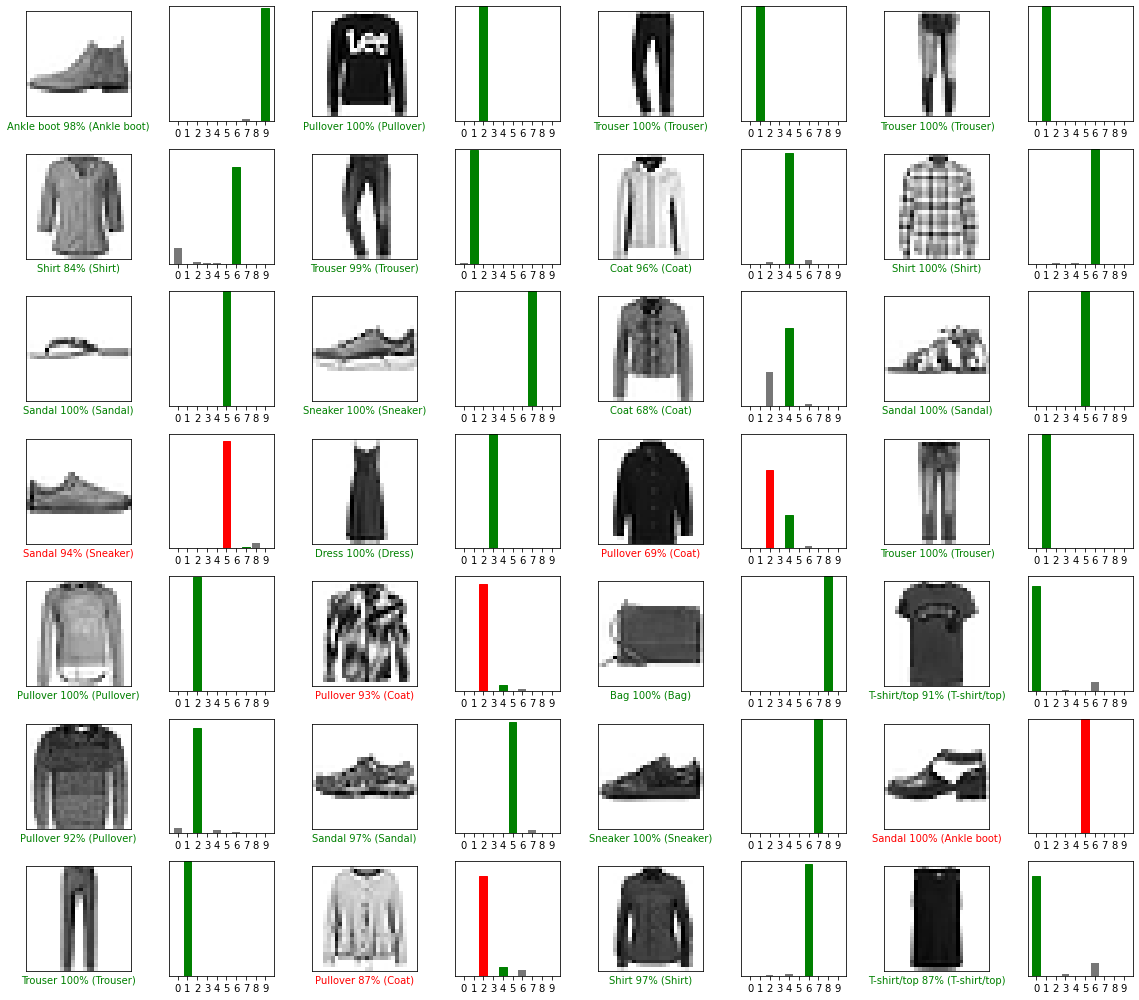

In [60]:
num_rows = 7
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()